In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
from scipy.stats import linregress

# Import the FRED API key
from api_keys import fredapi_key 

# GDP DATA (for recession) 

In [2]:
# Set the API base URL and parameters
url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'GDP'
fredapi_key = fredapi_key
params = {"series_id": fred_series_id,"apiKey": fredapi_key}

# Build query URL
query_url = f"{url}series_id={fred_series_id}&api_key={fredapi_key}&file_type=json"

# Get FRED GDP data 
gdp_response = requests.get(query_url, params=params).json()


In [3]:
# Create a data frame for GDP and years
gdp_data = pd.DataFrame(gdp_response["observations"])
gdp_data = gdp_data[["date", "value"]]

gdp_data= gdp_data[gdp_data["value"] != "."]

gdp_data["date"] = gdp_data["date"].apply(pd.to_datetime)
gdp_data = gdp_data.astype({"value": float})

gdp_data.head()

,date,value
4,1947-01-01,243.164
5,1947-04-01,245.968
6,1947-07-01,249.585
7,1947-10-01,259.745
8,1948-01-01,265.742


In [4]:
# Convert the date column to datetime objects
gdp_data['date'] = pd.to_datetime(gdp_data['date'], format='%Y-%m-%d')
    
# Set the date column as the index of the dataframe
gdp_data = gdp_data.set_index('date')



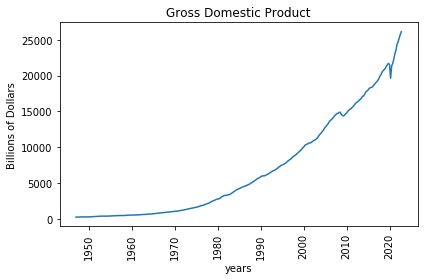

In [5]:
# Generate a line plot for GDP and years
plt.plot(gdp_data.index, gdp_data['value'])

# Incorporate the other graph properties
plt.title("Gross Domestic Product")
plt.ylabel("Billions of Dollars")
plt.xlabel("years")
plt.xticks(rotation="90")
plt.tight_layout()

# Show plot
plt.show()

# Interest Rates


In [6]:
# Set the API base URL and parameters
url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fredapi_key = fredapi_key
params = {"series_id": fred_series_id,"apiKey": fredapi_key}

# Build query URL
query_url = f"{url}series_id={fred_series_id}&api_key={fredapi_key}&file_type=json"

# Get FRED GDP data 
int_response = requests.get(query_url, params=params).json()


In [7]:
# Create a data frame for interest rate and years
int_data = pd.DataFrame(int_response["observations"])
int_data = int_data[["date", "value"]]

int_data.dropna(inplace=True)

int_data["date"] = int_data["date"].apply(pd.to_datetime)
int_data = int_data.astype({"value": float})

# Convert the date column to datetime objects
int_data['date'] = pd.to_datetime(int_data['date'], format='%Y-%m-%d')
    
# Set the date column as the index of the dataframe
int_data = int_data.set_index('date')


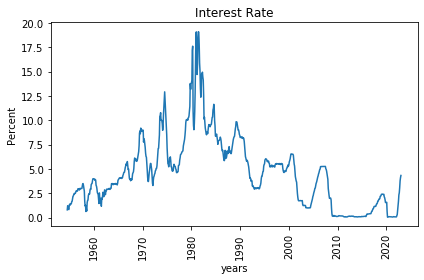

In [8]:
# Generate a line plot for interest rate and years
plt.plot(int_data.index, int_data['value'])

# Incorporate the other graph properties
plt.title("Interest Rate")
plt.ylabel("Percent")
plt.xlabel("years")
plt.xticks(rotation="90")
plt.tight_layout()

# Show plot
plt.show()

In [9]:
#Merge GDP and interest rates DF
merged_df = pd.merge(gdp_data, int_data, on='date')

int_data.dropna(inplace=True)

merged_df

,value_x,value_y
date,,
1954-07-01,390.996,0.80
1954-10-01,399.734,0.85
1955-01-01,413.073,1.39
1955-04-01,421.532,1.43
1955-07-01,430.221,1.68
...,...,...
2021-10-01,24349.121,0.08
2022-01-01,24740.480,0.08
2022-04-01,25248.476,0.33


In [10]:
gdp1k = merged_df.value_x.map(lambda x: x/1000)

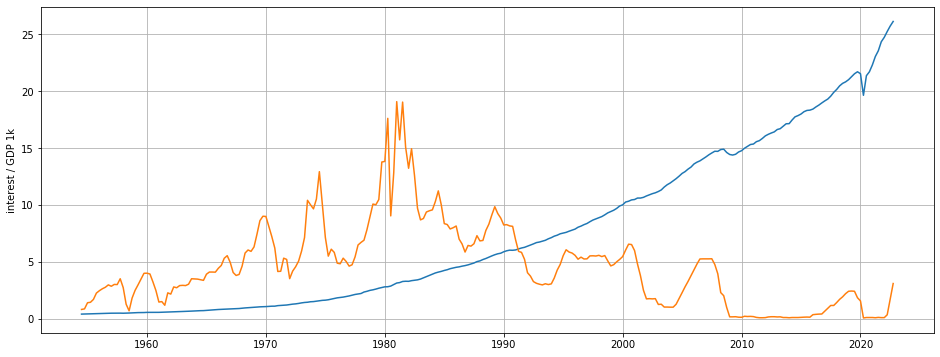

In [11]:

plt.figure(figsize=[16,6])
plt.grid()
plt.ylabel('interest / GDP 1k')
plt.plot(merged_df.index,gdp1k)
plt.plot(merged_df.index,merged_df.value_y)

The r-value is: 0.26


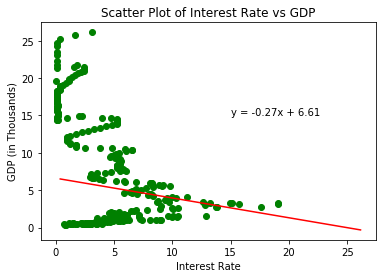

In [17]:
# Set x and y values
gdp1k = merged_df.value_x.map(lambda x: x/1000)
interest_rate = merged_df.value_y

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(gdp1k, interest_rate)
regress_values = gdp1k * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

#Generate scatter chat
plt.scatter(interest_rate, gdp1k, marker = "o", facecolor="green")

# Plot line 
plt.plot(gdp1k, regress_values, 'r')
plt.annotate(line_eq,(15,15))

# Define X and y values
plt.xlabel("Interest Rate")
plt.ylabel("GDP (in Thousands)")
plt.title("Scatter Plot of Interest Rate vs GDP")

# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")
